In [1]:
!pip install pmdarima
from IPython.display import clear_output
clear_output()

In [2]:
import tensorflow as tf 

ImportError: Traceback (most recent call last):
  File "/Users/bhavi/Library/Python/3.8/lib/python/site-packages/tensorflow/python/__init__.py", line 61, in <module>
    from tensorflow.python import pywrap_tensorflow
  File "/Users/bhavi/Library/Python/3.8/lib/python/site-packages/tensorflow/python/pywrap_tensorflow.py", line 28, in <module>
    _pywrap_tensorflow = swig_import_helper()
  File "/Users/bhavi/Library/Python/3.8/lib/python/site-packages/tensorflow/python/pywrap_tensorflow.py", line 24, in swig_import_helper
    _mod = imp.load_module('_pywrap_tensorflow', fp, pathname, description)
  File "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.8/lib/python3.8/imp.py", line 242, in load_module
    return load_dynamic(name, filename, file)
  File "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.8/lib/python3.8/imp.py", line 342, in load_dynamic
    return _load(spec)
ImportError: dlopen(/Users/bhavi/Library/Python/3.8/lib/python/site-packages/tensorflow/python/_pywrap_tensorflow.so, 0x000A): tried: '/Users/bhavi/Library/Python/3.8/lib/python/site-packages/tensorflow/python/_pywrap_tensorflow.so' (mach-o file, but is an incompatible architecture (have 'x86_64', need 'arm64e')), '/usr/local/lib/_pywrap_tensorflow.so' (no such file), '/usr/lib/_pywrap_tensorflow.so' (no such file)


Failed to load the native TensorFlow runtime.

See https://github.com/tensorflow/tensorflow/blob/master/tensorflow/g3doc/get_started/os_setup.md#import_error

for some common reasons and solutions.  Include the entire stack trace
above this error message when asking for help.

In [ ]:
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from sklearn.preprocessing import minmax_scale
plt.style.use('fivethirtyeight')
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import math


In [ ]:
# load stock data into pandas DataFrame
df = pd.read_csv('VIX Data - final.csv')
df = df.fillna(method='bfill')
df = df.drop(['Date'], axis = 1)
df = df[::-1]
df.index = df.index[::-1]
df = df[:-1]
df = df[:2500]

In [ ]:
#Test for staionarity

def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.api as sm
from pmdarima.arima import auto_arima
import torch
# Load the time series data
data = df['Volatility']
device = 'cuda'
# Define the train and test sets
train_size = int(len(data) * 0.9)
train_data, test_data = data[:train_size], data[train_size:]
# train_data_tensor = torch.Tensor([train_data]).to(device)



<Figure size 1000x600 with 0 Axes>

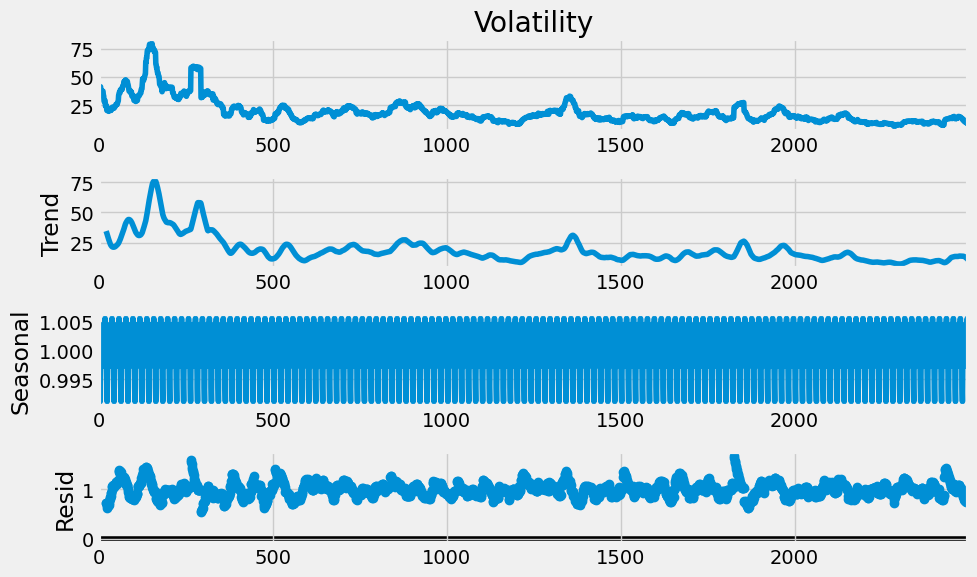

In [ ]:
result = sm.tsa.seasonal_decompose(data, model='multiplicative', period = 20, two_sided= 0)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(10, 6)

In [ ]:
# Perform automated order selection using auto_arima
auto_model = auto_arima(train_data, 
                         start_p=0, 
                         start_q=0,
                      # test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      # m=20,              # frequency of series
                      d=None,           # let model determine 'd'
                      # seasonal=True,   # No Seasonality
                      # start_P=0, 
                      # D=0, 
                      trace=True,
                      # error_action='ignore',  
                      # suppress_warnings=True, 
                      # stepwise=True
                      )

# Print the model summary
print(auto_model.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=6996.338, Time=0.20 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=6997.781, Time=0.46 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=6997.852, Time=0.95 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=6994.708, Time=0.23 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=6961.063, Time=3.24 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=6952.859, Time=2.42 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=6987.545, Time=0.85 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=6954.445, Time=3.22 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=6.27 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=6952.488, Time=1.49 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=6989.739, Time=0.37 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=6953.903, Time=2.51 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=6989.769, Time=0.57 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=6948.028, Time=6.30 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : 

In [ ]:
auto_model.seasonal_order

(0, 0, 0, 0)

/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


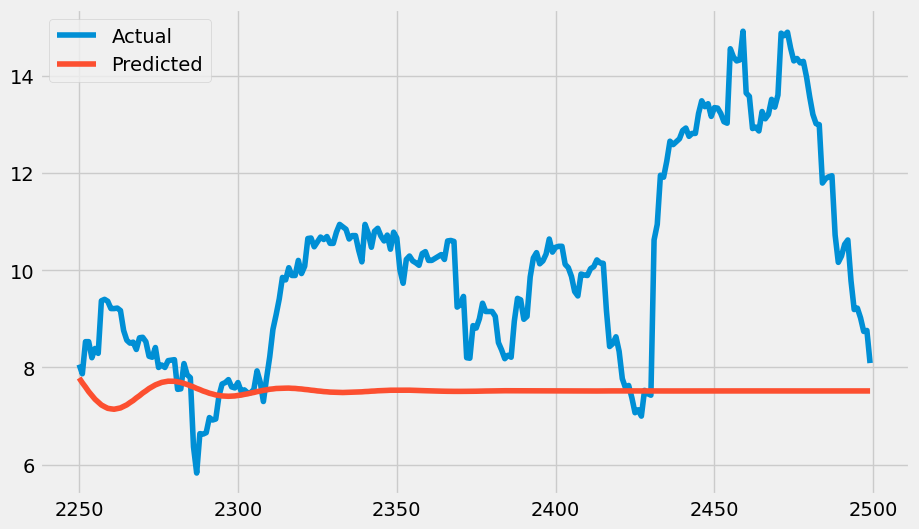

In [ ]:
# Fit the SARIMA model
sarima_model = SARIMAX(train_data, order=auto_model.order, seasonal_order=auto_model.seasonal_order)
sarima_fit = sarima_model.fit()

# Forecast the test set
forecast = sarima_fit.forecast(len(test_data))

# Plot the actual vs. predicted values
plt.plot(test_data.index, test_data.values, label='Actual')
plt.plot(test_data.index, forecast, label='Predicted')
plt.legend()
plt.show()

**SARIMAx** MODEL

ADF Statistic: -1.11
p-value: 0.71
Critical Values: {'1%': -3.4325716588757165, '5%': -2.862521582422426, '10%': -2.5672925232505994}
Non-stationary, applying Yeo-Johnson transformation
Lambda: 0.39
ADF Statistic: -0.17
p-value: 0.94
Critical Values: {'1%': -3.432574682127714, '5%': -2.8625229176692963, '10%': -2.567293234123949}
Non-stationary, applying Yeo-Johnson transformation
Lambda: -0.00
ADF Statistic: -2.17
p-value: 0.22
Critical Values: {'1%': -3.432577713619062, '5%': -2.8625242565537934, '10%': -2.567293946934166}
Non-stationary, applying Yeo-Johnson transformation
Lambda: -1.56
ADF Statistic: -1.89
p-value: 0.34
Critical Values: {'1%': -3.432563387143659, '5%': -2.8625179291294662, '10%': -2.5672905782716513}
Non-stationary, applying Yeo-Johnson transformation
Lambda: 0.23
ADF Statistic: -3.50
p-value: 0.01
Critical Values: {'1%': -3.4325761968413655, '5%': -2.862523586655913, '10%': -2.5672935902864547}
Stationary
ADF Statistic: -2.02
p-value: 0.28
Critical Values: {'1%': 

/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


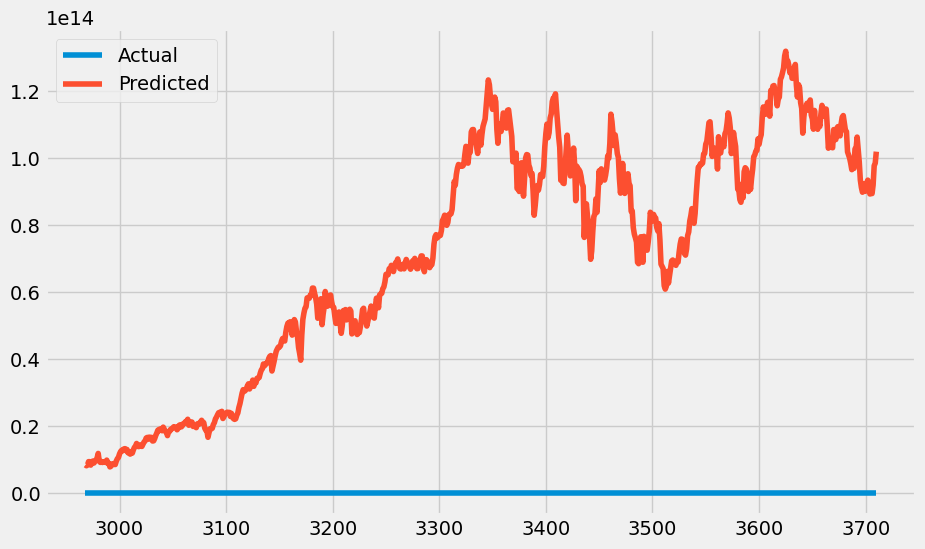

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima.arima import auto_arima
from statsmodels.tsa.stattools import adfuller

# Load the time series and exogenous variables data
data = df['Volatility']
exog = df.drop(['Volatility'], axis = 1)

# Define the train and test sets
train_size = int(len(data) * 0.8)
train_data, test_data = data[:train_size], data[train_size:]
train_exog, test_exog = exog[:train_size], exog[train_size:]

# Check and transform the stationarity of the exogenous variables
def check_stationarity(exog):
    stationary_exog = pd.DataFrame()
    for col in exog.columns:
        adf_result = adfuller(exog[col])
        print(f'ADF Statistic ({col}): {adf_result[0]:.2f}')
        print(f'p-value ({col}): {adf_result[1]:.2f}')
        print(f'Critical Values ({col}): {adf_result[4]}')
        if adf_result[1] <= 0.05:
            print(f'{col} is stationary')
            stationary_exog[col] = exog[col].diff().fillna(exog[col].iloc[0])
        else:
            print(f'{col} is non-stationary')
            stationary_exog[col] = exog[col]
    return stationary_exog

from scipy.stats import yeojohnson

def make_stationary(exog):
    adf_result = adfuller(exog)
    print(f'ADF Statistic: {adf_result[0]:.2f}')
    print(f'p-value: {adf_result[1]:.2f}')
    print(f'Critical Values: {adf_result[4]}')
    if adf_result[1] <= 0.05:
        print('Stationary')
        return exog
    else:
        print('Non-stationary, applying Yeo-Johnson transformation')
        transformed_exog, lam = yeojohnson(exog)
        print(f'Lambda: {lam:.2f}')
        return transformed_exog

train_exog_stationary = train_exog.apply(make_stationary)
test_exog_stationary = test_exog.apply(make_stationary)



# Perform automated order selection using auto_arima
auto_model = auto_arima(train_data, exogenous=train_exog_stationary, seasonal=True, m=12)

# Print the model summary
print(auto_model.summary())

# Fit the SARIMAX model
sarimax_model = SARIMAX(train_data, exog=train_exog_stationary, order=auto_model.order, seasonal_order=auto_model.seasonal_order)
sarimax_fit = sarimax_model.fit()

# Forecast the test set
forecast = sarimax_fit.forecast(len(test_data), exog=test_exog_stationary)


# Plot the actual vs. predicted values
plt.plot(test_data.index, test_data.values, label='Actual')
plt.plot(test_data.index, forecast, label='Predicted')
plt.legend()
plt.show()


In [ ]:
check_stationarity(train_exog_stationary)

ADF Statistic (Close): -1.12
p-value (Close): 0.71
Critical Values (Close): {'1%': -3.432563387143659, '5%': -2.8625179291294662, '10%': -2.5672905782716513}
Close is non-stationary
ADF Statistic (Volume): -2.56
p-value (Volume): 0.10
Critical Values (Volume): {'1%': -3.432569396823606, '5%': -2.8625205833655567, '10%': -2.5672919913619126}
Volume is non-stationary
ADF Statistic (Libor): -1.61
p-value (Libor): 0.48
Critical Values (Libor): {'1%': -3.4325754392267975, '5%': -2.862523252048813, '10%': -2.567293412144613}
Libor is non-stationary
ADF Statistic (US 10y Treasury yield): -1.29
p-value (US 10y Treasury yield): 0.64
Critical Values (US 10y Treasury yield): {'1%': -3.432562638221284, '5%': -2.86251759835993, '10%': -2.567290402173133}
US 10y Treasury yield is non-stationary
ADF Statistic (CBOE VIX): -3.50
p-value (CBOE VIX): 0.01
Critical Values (CBOE VIX): {'1%': -3.4325761968413655, '5%': -2.862523586655913, '10%': -2.5672935902864547}
CBOE VIX is stationary
ADF Statistic (WTI

,Close,Volume,Libor,US 10y Treasury yield,CBOE VIX,WTI Crude Oil Futures,Gold
0,66.486782,18.137179,0.558663,1.787857,912.74213,110.435260,401.751465
1,66.407296,18.516841,0.558466,1.806202,-35.52033,109.930035,399.837355
2,66.660250,18.397907,0.558576,1.784305,60.47443,110.024183,398.548131
3,67.229982,18.529201,0.558673,1.825041,-26.38233,111.815126,399.505908
4,67.272479,18.429712,0.559289,1.852017,-91.03778,112.286190,405.575028
...,...,...,...,...,...,...,...
2963,83.045417,19.693576,0.481486,0.484355,333.83301,66.422042,633.706069
2964,82.355837,20.000740,0.476322,0.492468,-799.06714,77.981133,643.666349
2965,85.173731,20.150834,0.468765,0.572110,-36.78833,71.095689,652.791015
2966,85.004979,20.243589,0.467774,0.611195,-240.64111,73.341223,652.255872
